<a href="https://colab.research.google.com/github/Gichere/time_series_regression_model/blob/main/linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting a Linear Regression on Africa Economic, Banking and Systemic Crisis Data,

# Focus on Kenya



### Dataset Context
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online.
The dataset is valuable to those who seek to understand the dynamics of financial stability within the African context.

### Dataset Content:
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

<h3>Dataset Description</h3>
<ul>
    <li>case: A number which denotes a specific country</li>
    <li>cc3: A three letter country code</li>
    <li>country: The name of the country</li>
    <li>year: The year of the observation</li>
    <li>systemic_crisis: "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.</li>
    <li>exch_usd: The exchange rate of the country vis-a-vis the USD</li>
    <li>domestic_debt_in_default: "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year</li>
    <li>sovereign_external_debt_default: "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year</li>
    <li>gdp_weighted_default: The total debt in default vis-a-vis the GDP</li>
    <li>inflation_annual_cpi: The annual CPI Inflation rate</li>
    <li>independence: "0" means "no independence" and "1" means "independence"</li>
    <li>currency_crises: "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year</li>
    <li>inflation_crises: "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year</li>
    <li>banking_crisis: "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year</li>
</ul>

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import matplotlib.image as mpimg

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

## 1. EDA
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [ ]:
afri_data = pd.read_csv('https://raw.githubusercontent.com/Gichere/time_series_regression_model/main/african_crises.csv',
                        index_col='cc3')
afri_data.head(3)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
cc3,,,,,,,,,,,,,
DZA,1,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,crisis
DZA,1,Algeria,1871,0,0.053,0,0,0.000,14.149,0,0,0,no_crisis
DZA,1,Algeria,1872,0,0.052,0,0,0.000,-3.719,0,0,0,no_crisis


In [ ]:
afri_data["banking_crisis_new"]=afri_data.banking_crisis.replace({'crisis':1,'no_crisis':0})
afri_data=afri_data.drop(columns='banking_crisis',axis=0)
afri_data.head(1)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
cc3,,,,,,,,,,,,,
DZA,1,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,1


In [ ]:
print("Checking the columns in the dataset.")
afri_data.columns

Checking the columns in the dataset.


Index(['case', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis_new'],
      dtype='object')

In [ ]:
afri_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, DZA to ZWE
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   country                          1059 non-null   object 
 2   year                             1059 non-null   int64  
 3   systemic_crisis                  1059 non-null   int64  
 4   exch_usd                         1059 non-null   float64
 5   domestic_debt_in_default         1059 non-null   int64  
 6   sovereign_external_debt_default  1059 non-null   int64  
 7   gdp_weighted_default             1059 non-null   float64
 8   inflation_annual_cpi             1059 non-null   float64
 9   independence                     1059 non-null   int64  
 10  currency_crises                  1059 non-null   int64  
 11  inflation_crises                 1059 non-null   int64  
 12  banking_crisis_new      

In [ ]:
afri_data.isnull().sum()

case                               0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis_new                 0
dtype: int64

The Dataset has no null value.

In [ ]:
afri_data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
count,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000
mean,35.614,1967.768,0.077,43.141,0.040,0.153,0.006,20848.892,0.776,0.132,0.129,0.089
std,23.692,33.531,0.267,111.475,0.195,0.360,0.044,675727.429,0.417,0.350,0.336,0.285
min,1.000,1860.000,0.000,0.000,0.000,0.000,0.000,-28.502,0.000,0.000,0.000,0.000
25%,15.000,1951.000,0.000,0.195,0.000,0.000,0.000,2.086,1.000,0.000,0.000,0.000
50%,38.000,1973.000,0.000,0.868,0.000,0.000,0.000,5.762,1.000,0.000,0.000,0.000
75%,56.000,1994.000,0.000,8.463,0.000,0.000,0.000,11.644,1.000,0.000,0.000,0.000
max,70.000,2014.000,1.000,744.306,1.000,1.000,0.400,21989695.220,1.000,2.000,1.000,1.000


## 1.2 Visualization

### How the 13 African countries were affected by the debt defaults and various crises between 1860 to 2014

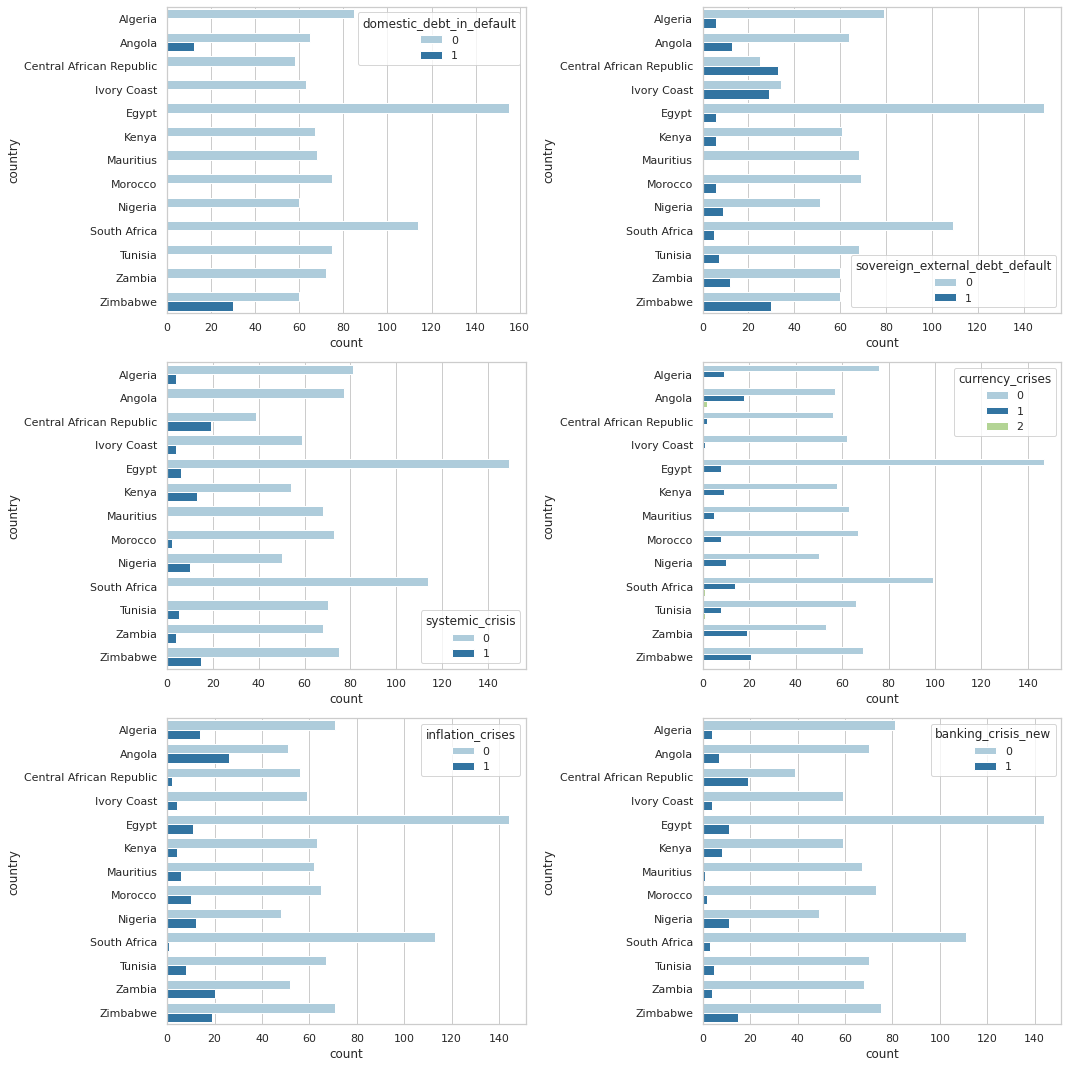

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
axes = axes.flatten()
cols = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis_new']
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = afri_data, hue = i, palette = 'Paired')
plt.tight_layout()
display()

### From the Visualization:
1) Only 2 countries; Angola and Zimbabwe were in the Domestic Debt in Default between the years 1860 and 2014

2) All the countries except Mauritius suffered Sovereign External Debt Default between the years 1860 and 2014. Countries that were affected the most include;Central African Republic, Ivory Coast and Zimbabwe.

3) Between 1860 and 2014, all countries except Angola, Mauritius and South Africa were affected by Systemic Crisis. Most affected countries being Central African Republic,Zimbabwe,Kenya and Nigeria.

4) All countries were affected by Currency Crisis in that period and the most affected countries were Zimbabwe,Zambia,Angola,South Africa.

5) All the countries were affected by the Inflation crisis in that period; the most affected countries being Angola, Zambia, Zimbabwe, Algeria.

6) Between the periods 1860 to 2014, all the countries suffered Banking Crisis and the most affected countries were;Central African Republic, Zimbabwe, Nigeria, Egypt and Kenya.

### other observations;
. All the countries that suffered systemic crisis also suffered banking crisis. Central African Republic, Zimbabwe,Kenya and Nigeria had the highest count in each case at that time.

. Zimbabwe suffered all the debt defaults as well as crises in that period.

### The debt defaults and crises situation in the African Countries Before and after Independence?

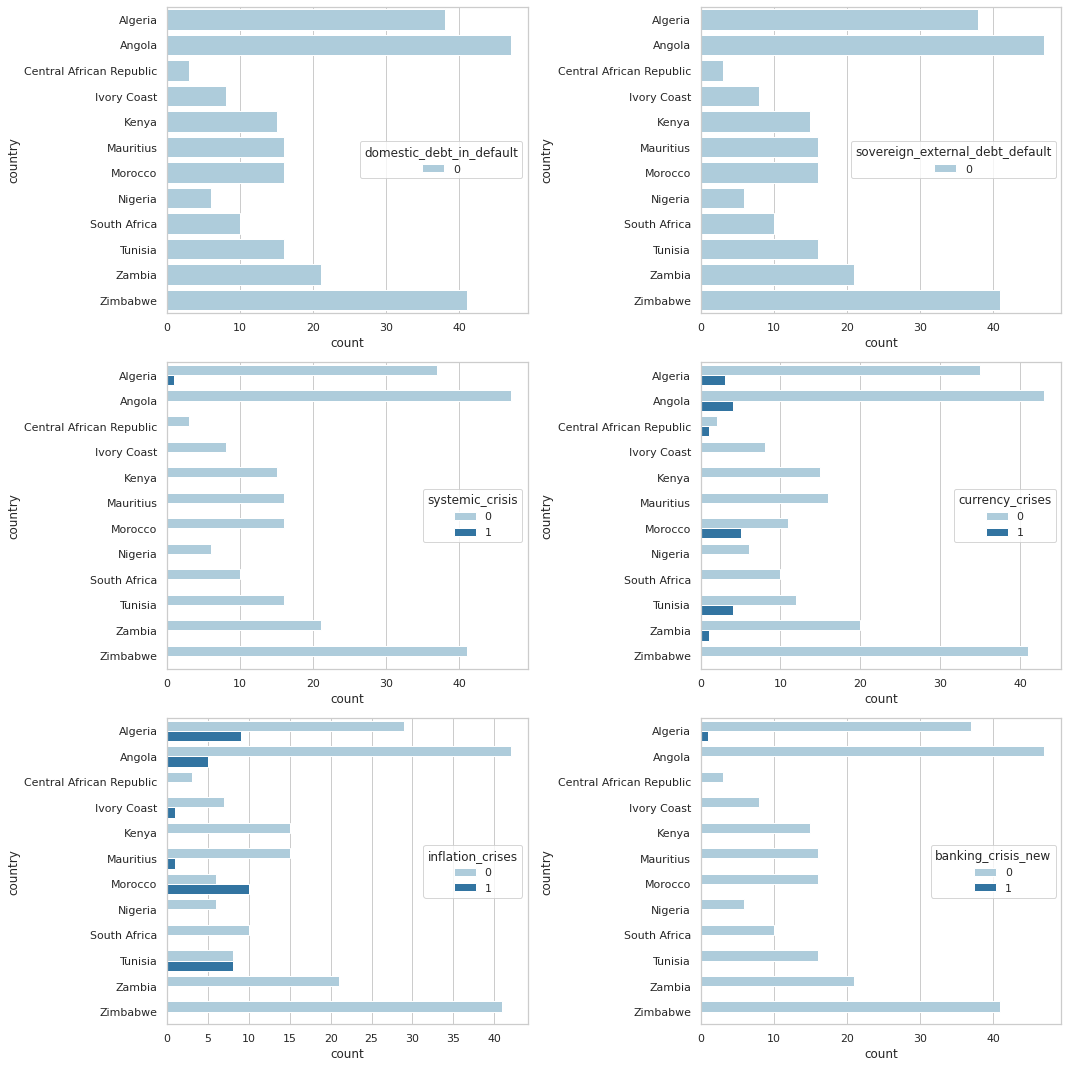

In [ ]:
# Before Independence
before_independence = afri_data[afri_data['independence']==0]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
axes = axes.flatten()
cols = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis_new']
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = before_independence, hue = i, palette = 'Paired')
plt.tight_layout()
display()

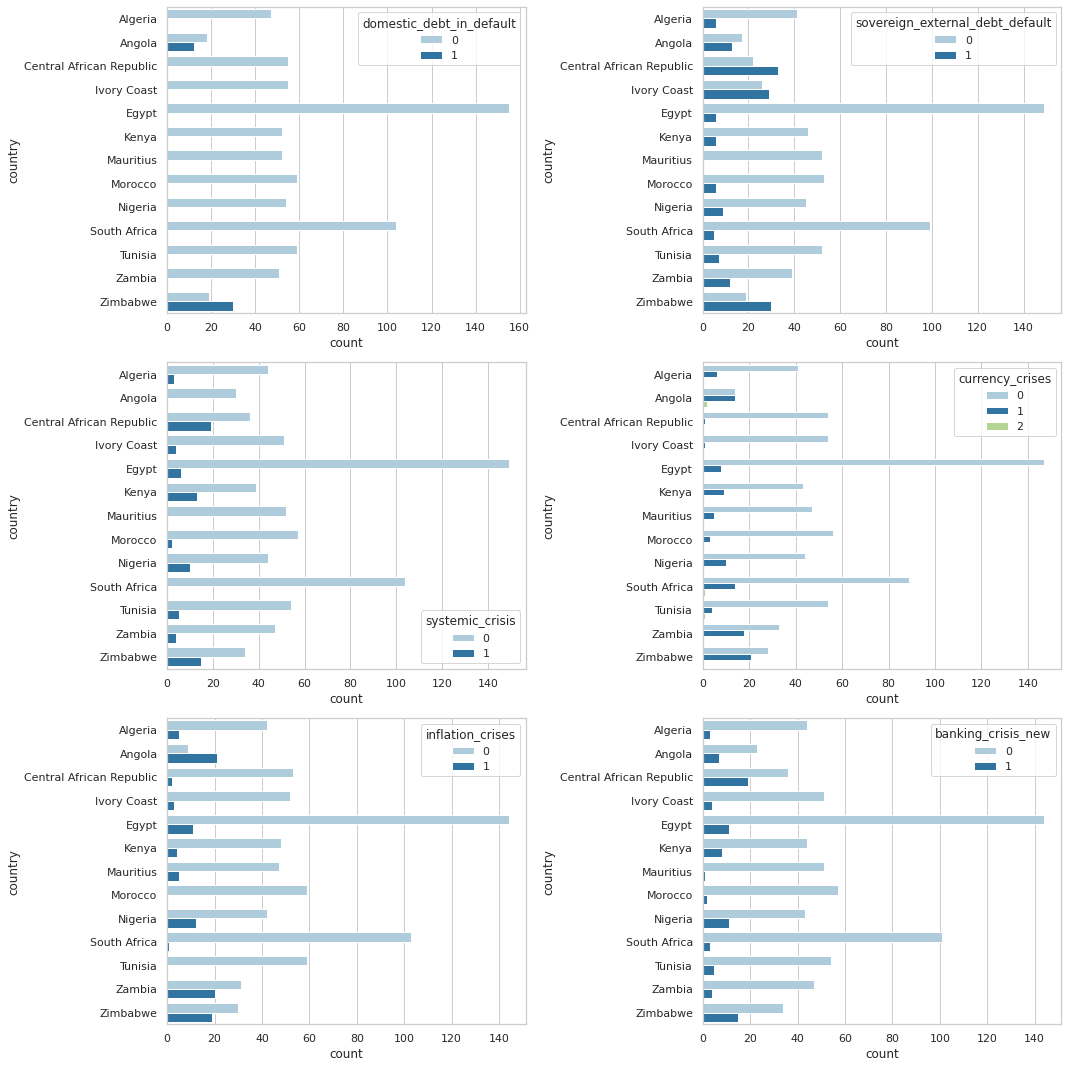

In [ ]:
# After Independence
after_independence = afri_data[afri_data['independence']==1]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
axes = axes.flatten()
cols = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis_new']
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = after_independence, hue = i, palette = 'Paired')
plt.tight_layout()
display()

### Observation Before and After independence
1) After Independence was when most African countries started suffering Economic, Banking and Systemic Crises.

2) Inflation and Currency crisis were the major forms of crises affecting some African countries before the independence, Inflation being the most and majorly affected Morocco, Algeria, Tunisia and Angola. These countries in contrast, recorded lowest count of crises and debt defaults after independence except Angola.

3) Majority of the African Countries that had Banking crisis also had Systemic Crisis after independence. Most affected were Central Africa Republic,Zimbabwe,Kenya and Nigeria.

4) No country suffered either domestic or external debt defaults before independence but after independence, most countries suffered especially the external debt crisis most affected being Central Africa Republic, Ivory Coast, Zimbabwe, Zambia, Angola.
5) Zimbabwe is the country that has majorly been affected by all the crises and debt defaults after the independence. This country on the other hand, never experienced any form of crisis or debt default before independence.

6) Mauritius is the only country that recorded the least count of the economic and banking crises before and after independence.

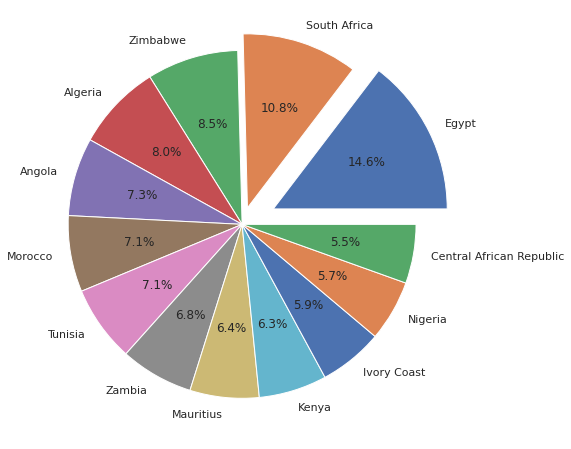

In [ ]:
# Dataset is non-uniform and recently formed countries have least data
plt.figure(figsize=(8,8))
counts= afri_data['country'].value_counts()
country=counts.index
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0)
plt.pie(counts, explode=explode,labels=country,autopct='%1.1f%%')
plt.show()

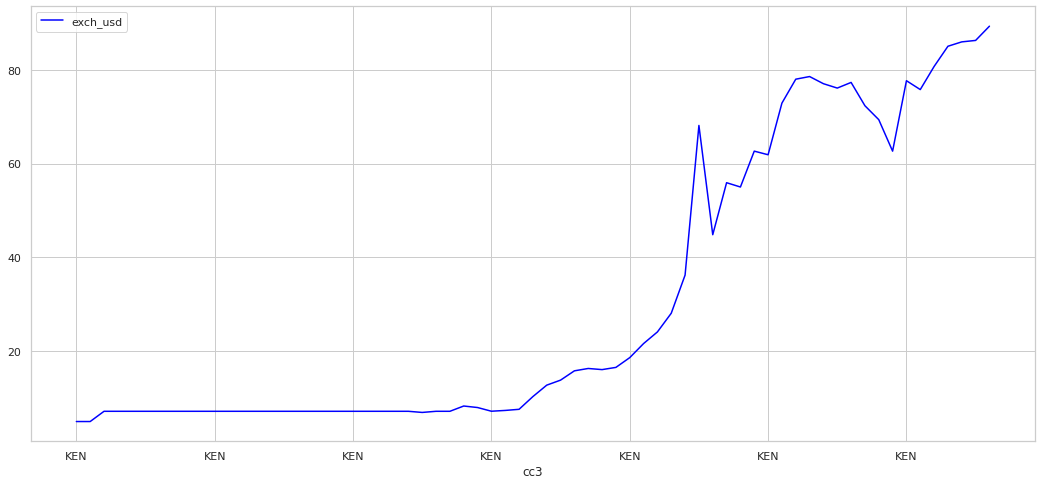

In [ ]:
afri_data.loc['KEN',['exch_usd']].plot(color='blue', figsize=(18,8))


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Factors most associated with exchange usd in Kenya

In [ ]:
KEN=afri_data.loc['KEN',['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis_new']] 
KEN.head(1)

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
cc3,,,,,,,,,,,,
KEN,Kenya,1948,0,4.958,0,0,0.000,9.340,0,0,0,0


In [ ]:
add = pd.read_csv('https://raw.githubusercontent.com/Gichere/time_series_regression_model/main/yeni.csv',
                  index_col=0)
add.head(5)

,GDP,Per Capita,Growth,year
0,4.949,162.608,4.914,1965
1,5.278,168.963,5.046,1966
2,5.605,174.863,0.805,1967
3,5.932,180.411,-1.607,1968
4,6.524,193.586,5.279,1969


In [ ]:
add = add.drop(columns='year',axis=0)
add = add.rename(columns={" Growth": "growth", " Per Capita": "per_capita", "GDP":"gdp"})

In [ ]:
KEN=KEN.loc [ KEN ['year'] >=1965]
KEN=KEN.reset_index()
KEN.head(2)

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
0,KEN,Kenya,1965,0,7.143,0,0,0.000,5.762,1,0,0,0
1,KEN,Kenya,1966,0,7.143,0,0,0.000,3.762,1,0,0,0


In [ ]:
ke_new = pd.concat([KEN,add], axis=1)
ke_new.head(2)

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new,gdp,per_capita,growth
0,KEN,Kenya,1965,0,7.143,0,0,0.000,5.762,1,0,0,0,4.949,162.608,4.914
1,KEN,Kenya,1966,0,7.143,0,0,0.000,3.762,1,0,0,0,5.278,168.963,5.046


In [ ]:
ke_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cc3                              50 non-null     object 
 1   country                          50 non-null     object 
 2   year                             50 non-null     int64  
 3   systemic_crisis                  50 non-null     int64  
 4   exch_usd                         50 non-null     float64
 5   domestic_debt_in_default         50 non-null     int64  
 6   sovereign_external_debt_default  50 non-null     int64  
 7   gdp_weighted_default             50 non-null     float64
 8   inflation_annual_cpi             50 non-null     float64
 9   independence                     50 non-null     int64  
 10  currency_crises                  50 non-null     int64  
 11  inflation_crises                 50 non-null     int64  
 12  banking_crisis_new      

In [ ]:
ke_new.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new,gdp,per_capita,growth
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,1989.500,0.260,38.814,0.000,0.120,0.000,10.419,1.000,0.180,0.080,0.160,70.701,1009.828,5.048
std,14.577,0.443,31.543,0.000,0.328,0.000,8.169,0.000,0.388,0.274,0.370,78.284,852.935,2.690
min,1965.000,0.000,6.900,0.000,0.000,0.000,-0.131,1.000,0.000,0.000,0.000,4.949,162.608,-1.607
25%,1977.250,0.000,7.388,0.000,0.000,0.000,5.726,1.000,0.000,0.000,0.000,14.504,357.520,3.514
50%,1989.500,0.000,22.843,0.000,0.000,0.000,8.622,1.000,0.000,0.000,0.000,40.855,771.750,4.917
75%,2001.750,0.750,72.790,0.000,0.000,0.000,13.617,1.000,0.000,0.000,0.000,89.227,1268.282,5.988
max,2014.000,1.000,89.350,0.000,1.000,0.000,45.979,1.000,1.000,1.000,1.000,305.530,3378.831,13.280


In [ ]:
ke_new=ke_new.drop(columns=['independence','domestic_debt_in_default', 'gdp_weighted_default', 'sovereign_external_debt_default'],axis=0)

In [ ]:
ke_new.corr().exch_usd.abs().sort_values()

inflation_annual_cpi   0.007
currency_crises        0.022
inflation_crises       0.023
systemic_crisis        0.062
banking_crisis_new     0.066
growth                 0.249
gdp                    0.824
per_capita             0.845
year                   0.939
exch_usd               1.000
Name: exch_usd, dtype: float64

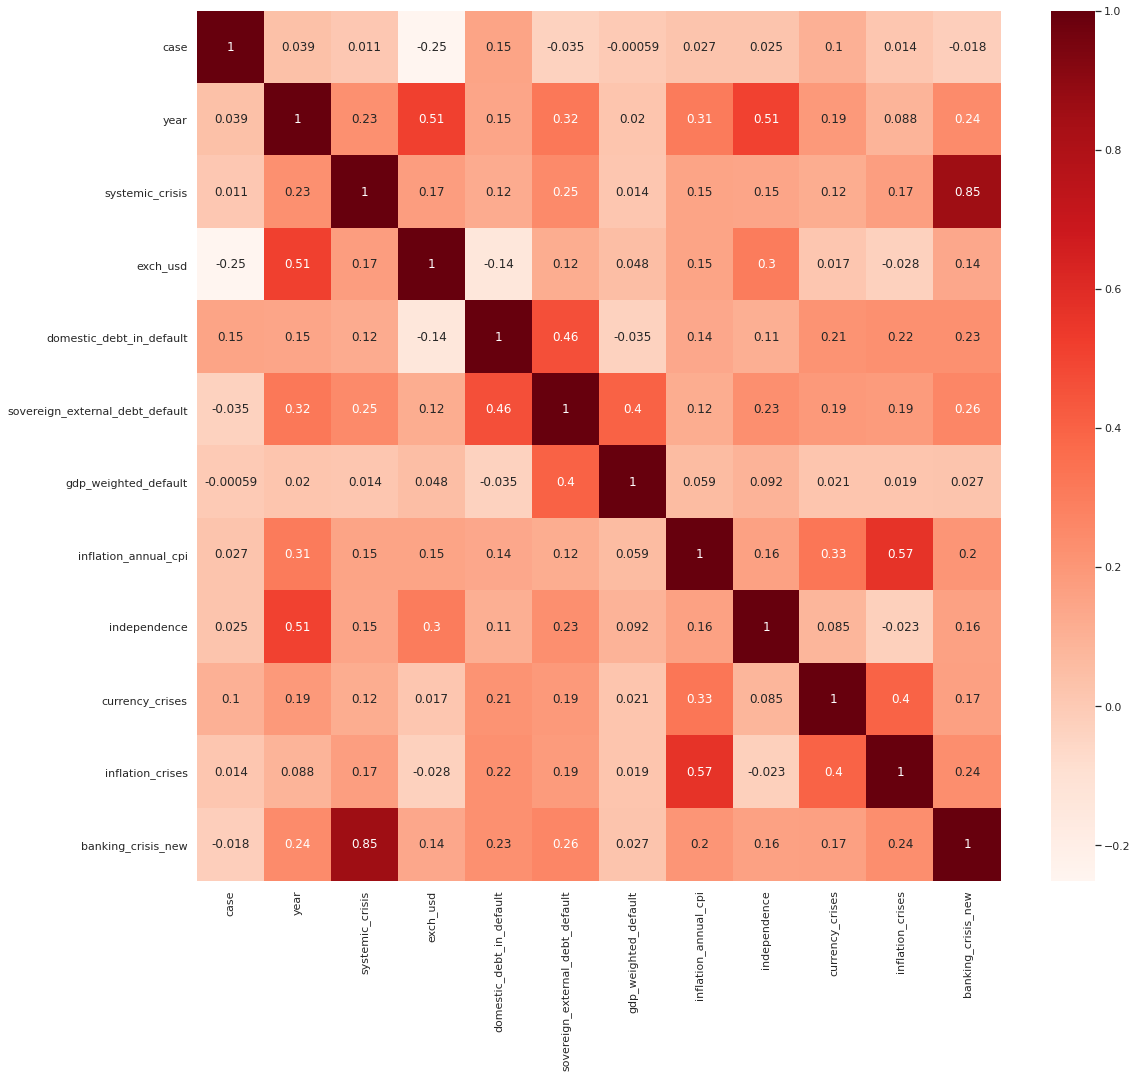

In [ ]:
#Correlation Matrix
plt.figure(figsize=(18,16))
cor = afri_data.corr(method='spearman')
#Correlation with output variable
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### From the correlation matrix;
1) All the features show a positive correlation with Banking crisis.

2) Banking crisis has a very strong Positive correlation with Systemic crisis.This explains why the African countries that were majorly affected by Banking crisis had suffered Systemic Crisis.

3) Apart from Systemic Crisis, Banking Crisis also shows strong positive correlation with Sovereign External Debt Default, domestic_debt_in_default,year, inflation_annual_cpi and Inflation Crisis.



# 3. Fitting the Linear Model and Feature selection

In [ ]:
#Model 1
Y = ke_new['exch_usd']


X = ke_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 'inflation_crises',
       'banking_crisis_new', 'gdp', 'per_capita', 'growth']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set   : {}".format(X_test.shape[0]))

Number of observations in the training set : 35
Number of observations in the test set   : 15


In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     31.13
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.09e-11
Time:                        09:34:21   Log-Likelihood:                -122.04
No. Observations:                  35   AIC:                             264.1
Df Residuals:                      25   BIC:                             279.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4516.8707    597.490     -7.560      0.000   -5747.424   -3286.317
year                     2.3039      0.304      7.570      0.000       1.677       2.931
systemic_crisis         13.3432      6.476      2.060      0.050       0.005      26.681
inflation_annual_cpi     0.0499      0.296      0.168      0.868      -0.561       0.660
currency_crises         -6.3292      4.641     -1.364      0.185     -15.888       3.230
inflation_crises        10.3502      8.546      1.211      0.237      -7.251      27.951
banking_crisis_new     -11.9438      6.263     -1.907      0.068     -24.844       0.956
gdp                      1.0650      0.385      2.765      0.011       0.272       1.858
per_capita              -0.1026      0.037     -2.748      0.011      -0.180      -0.026
growth                  -0.6954      0.674     -1.032      0.312      -2.084       0.693
==============================================================================
Omnibus:                        0.560   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.662
Skew:                           0.252   Prob(JB):                        0.718
Kurtosis:                       2.553   Cond. No.                     8.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


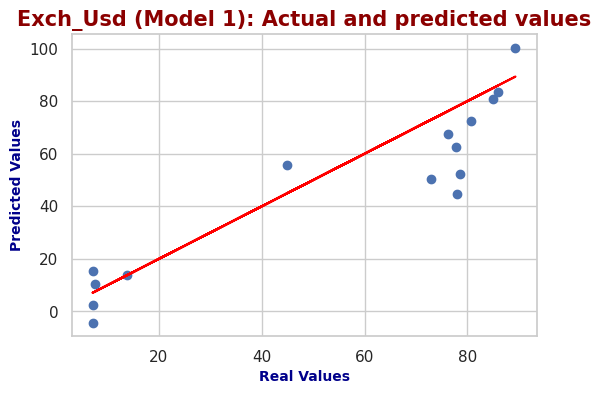

Mean Absolute Error (MAE)        : 11.373511487173896
Mean Squared Error (MSE)          : 212.46820870575877
Root Mean Squared Error (RMSE)     : 14.576289263929924
Mean Absolute Percentage Error (MAPE) : 38.160676731071675


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Exch_Usd (Model 1): Actual and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 2
ke_new['inflation']=ke_new['inflation_annual_cpi']*ke_new['inflation_crises']

In [ ]:
Y = ke_new['exch_usd']

X = ke_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 
       'banking_crisis_new', 'gdp', 'per_capita','inflation']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set : {}".format(X_test.shape[0]))

Number of observations in the training set : 35
Number of observations in the test set : 15


In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     44.33
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.24e-13
Time:                        09:34:21   Log-Likelihood:                -118.86
No. Observations:                  35   AIC:                             255.7
Df Residuals:                      26   BIC:                             269.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4464.5207    529.623     -8.430      0.000   -5553.177   -3375.864
year                     2.2766      0.270      8.436      0.000       1.722       2.831
systemic_crisis         12.8897      5.632      2.288      0.030       1.312      24.467
inflation_annual_cpi    -0.4246      0.311     -1.365      0.184      -1.064       0.215
currency_crises         -7.7079      4.137     -1.863      0.074     -16.212       0.797
banking_crisis_new     -13.5095      5.636     -2.397      0.024     -25.094      -1.925
gdp                      0.9667      0.328      2.946      0.007       0.292       1.641
per_capita              -0.0932      0.032     -2.916      0.007      -0.159      -0.028
inflation                0.8395      0.289      2.903      0.007       0.245       1.434
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.505
Skew:                          -0.163   Prob(JB):                        0.777
Kurtosis:                       2.510   Cond. No.                     8.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

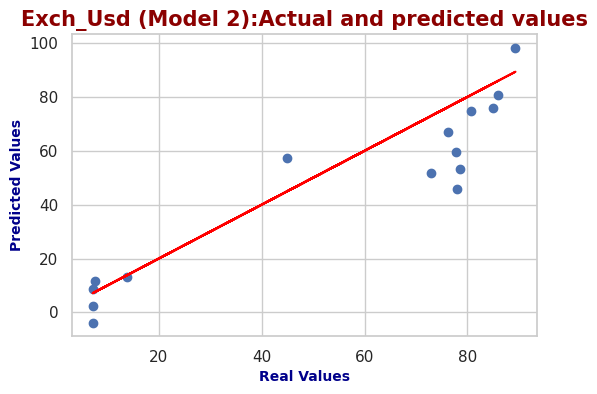

Mean Absolute Error (MAE)        : 11.28785710777097
Mean Squared Error (MSE)          : 205.46315854745842
Root Mean Squared Error (RMSE)     : 14.333986136014587
Mean Absolute Percentage Error (MAPE) : 33.11047602429234


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Exch_Usd (Model 2):Actual and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 3
ke_new['crises'] = ke_new.banking_crisis_new*ke_new.systemic_crisis

In [ ]:
Y = ke_new['exch_usd']

X = ke_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 
       'banking_crisis_new', 'gdp', 'per_capita','crises']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set   : {}".format(X_test.shape[0]))

Number of observations in the training set : 35
Number of observations in the test set   : 15


In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     43.21
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           6.94e-13
Time:                        09:34:22   Log-Likelihood:                -125.09
No. Observations:                  35   AIC:                             264.2
Df Residuals:                      28   BIC:                             275.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4553.1386    602.744     -7.554      0.000   -5787.804   -3318.473
year                     2.3208      0.307      7.555      0.000       1.692       2.950
systemic_crisis         14.2070      6.407      2.218      0.035       1.084      27.330
inflation_annual_cpi     0.1154      0.206      0.559      0.580      -0.307       0.538
banking_crisis_new      -4.5742      3.155     -1.450      0.158     -11.038       1.889
gdp                      1.2404      0.359      3.452      0.002       0.504       1.976
per_capita              -0.1176      0.035     -3.353      0.002      -0.189      -0.046
crises                  -4.5742      3.155     -1.450      0.158     -11.038       1.889
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.134
Skew:                           0.150   Prob(JB):                        0.935
Kurtosis:                       3.052   Cond. No.                     3.58e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

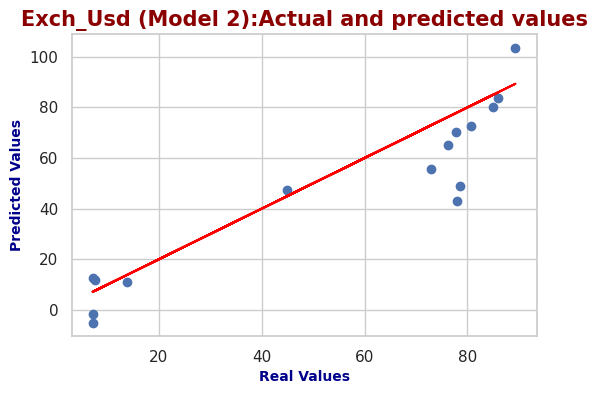

Mean Absolute Error (MAE)        : 11.046373443604814
Mean Squared Error (MSE)          : 210.6612237275096
Root Mean Squared Error (RMSE)     : 14.514173201650502
Mean Absolute Percentage Error (MAPE) : 41.159156954763034


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Exch_Usd (Model 2):Actual and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 4
Y = ke_new['exch_usd']

X = ke_new[[ 'year', 'inflation_annual_cpi', 'banking_crisis_new', 'gdp', 'per_capita']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set   : {}".format(X_test.shape[0]))

Number of observations in the training set : 35
Number of observations in the test set   : 15


In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     44.81
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           9.05e-13
Time:                        09:34:22   Log-Likelihood:                -127.92
No. Observations:                  35   AIC:                             267.8
Df Residuals:                      29   BIC:                             277.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4507.4780    641.791     -7.023      0.000   -5820.088   -3194.867
year                     2.2945      0.327      7.016      0.000       1.626       2.963
inflation_annual_cpi     0.0735      0.219      0.336      0.739      -0.374       0.521
banking_crisis_new       0.0094      5.084      0.002      0.999     -10.389      10.408
gdp                      0.8145      0.324      2.517      0.018       0.153       1.476
per_capita              -0.0781      0.032     -2.426      0.022      -0.144      -0.012
==============================================================================
Omnibus:                        2.950   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.668
Skew:                           0.608   Prob(JB):                        0.263
Kurtosis:                       2.406   Cond. No.                     7.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

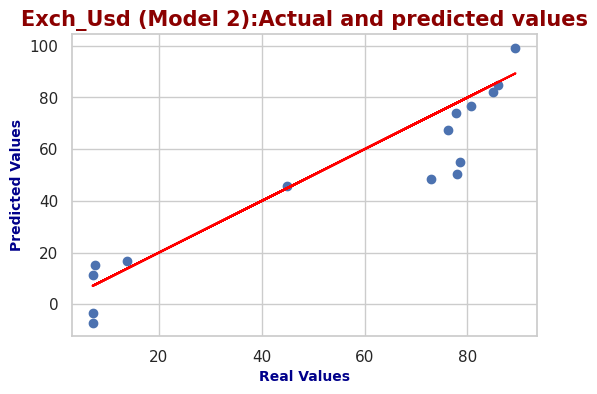

Mean Absolute Error (MAE)        : 9.7897505412456
Mean Squared Error (MSE)          : 168.4471990465892
Root Mean Squared Error (RMSE)     : 12.978721009659973
Mean Absolute Percentage Error (MAPE) : 44.409281661637095


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Exch_Usd (Model 2):Actual and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 5
Y = ke_new['exch_usd']

X = ke_new[[ 'year', 'inflation_annual_cpi', 'gdp', 'per_capita']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set : {}".format(X_test.shape[0]))

Number of observations in the training set : 35
Number of observations in the test set : 15


In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     57.94
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.10e-13
Time:                        09:34:23   Log-Likelihood:                -127.92
No. Observations:                  35   AIC:                             265.8
Df Residuals:                      30   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4507.3992    629.602     -7.159      0.000   -5793.218   -3221.580
year                     2.2944      0.321      7.153      0.000       1.639       2.949
inflation_annual_cpi     0.0736      0.208      0.354      0.726      -0.352       0.499
gdp                      0.8142      0.292      2.792      0.009       0.219       1.410
per_capita              -0.0781      0.029     -2.657      0.013      -0.138      -0.018
==============================================================================
Omnibus:                        2.950   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.669
Skew:                           0.608   Prob(JB):                        0.263
Kurtosis:                       2.406   Cond. No.                     7.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

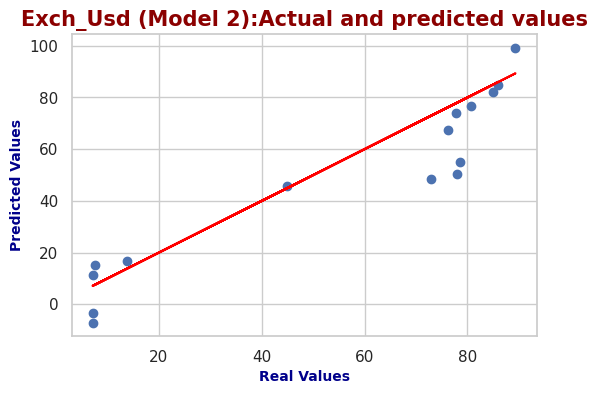

Mean Absolute Error (MAE)        : 9.78880984944464
Mean Squared Error (MSE)          : 168.4123396261364
Root Mean Squared Error (RMSE)     : 12.977377995039538
Mean Absolute Percentage Error (MAPE) : 44.41399920958197


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Exch_Usd (Model 2):Actual and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# Conclusion:

When we look at the MAE (9.78), MSE(168.41), RMSE(12.97), R Squared(0.88) values and the prediction graph of the 5th model among the 5 models we created, more meaningful results are obtained. The variables '' year ',' inflation_annual_cpi ',' gdp ',' per_capita '' are effective on the dollar rate of Kenya.

R-squared(0.88) is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. The relationship between the model and the dependent variable is 88% out a 100% scale. 

# Weaknesses of the Linear Model
1. Main limitation of Linear Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. It assumes that there is a straight-line relationship between the dependent and independent variables which is incorrect many times.

2. Prone to noise and overfitting: If the number of observations are lesser than the number of features, Linear Regression should not be used, otherwise it may lead to overfit because it starts considering noise in this scenario while building the model.

3. Prone to outliers: Linear regression is very sensitive to outliers (anomalies). So, outliers should be analyzed and removed before applying Linear Regression to the dataset.

4. Prone to multicollinearity: Before applying Linear regression, multicollinearity should be removed (using dimensionality reduction techniques) because it assumes that there is no relationship among independent variables.

In summary, Linear Regression is great tool to analyze the relationships among variables but it isn’t recommended for most practical applications because it over-simplifies real world problems by assuming linear relationship among the variables

# How Linear Model Can be Improved
##### Fit many models

Think of a series of models, starting with the too-simple and continuing through to the hopelessly messy. Generally it’s a good idea to start simple. Or start complex if you’d like, but prepare to quickly drop things out and move to the simpler model to help understand what’s going on. Working with simple models is not a research goal—in the problems we work on, we usually find complicated models more believable—but rather a technique to help understand the fitting process.

A corollary of this principle is the need to be able to fit models relatively quickly. Realistically, you don’t know what model you want to be fitting, so it’s rarely a good idea to run the computer overnight fitting a single model. At least, wait until you’ve developed some understanding by fitting many models.
Graphing the relevant and not the irrelevant

## Graphing the fitted model

Graphing the data is fine but it is also useful to graph the estimated model itself. A table of regression coefficients does not give you the same sense as graphs of the model. This point should seem obvious but can be obscured in statistical textbooks that focus so strongly on plots for raw data and for regression diagnostics, forgetting the simple plots that help us understand a model.

Don’t graph the irrelevant, Focus on something more important. A quick rule: any graph you show, be prepared to explain.

#### Transformations

Considering variable transformation in sight:
• Logarithms of all-positive variables (primarily because this leads to multiplicative models on the original scale, which often makes sense)
• Standardizing based on the scale or potential range of the data (so that coefficients can be more directly interpreted and scaled); an alternative is to present coefficients in scaled and unscaled forms
• Transforming before multilevel modeling (thus attempting to make coefficients more comparable, thus allowing more effective second-level regressions, which in turn improve partial pooling).

Plots of raw data and residuals can also be informative when considering transformations.

In addition to univariate transformations, considering interactions and predictors created by combining inputs is very wise. The goal is to create models that could make sense (and can then be fit and compared to data) and that include all relevant information.

#### Consider all coefficients as potentially varying

Not getting hung up on whether a coefficient should vary by group. Just allow it to vary in the model, and then, if the estimated scale of variation is small, maybe ignoring it if that would be more convenient.

Practical concerns sometimes limit the feasible complexity of a model—for example, we might fit a varying-intercept model first, then allow slopes to vary, then add group-level predictors, and so forth. Generally, however, it is only the difficulties of fitting and, especially, understanding the models that keeps us from adding even more complexity, more varying coefficients, and more interactions.